In [3]:
# Installing necessary libraries
!pip install yfinance tensorflow scikit-learn

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
window_size = 60

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

In [6]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

X, y = create_sequences(scaled_data, window_size)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

def build_lstm_model(window_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_lstm_model(window_size)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 2.5789e-04 - val_loss: 0.0016
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.8681e-04 - val_loss: 0.0012
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.6743e-04 - val_loss: 0.0015
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.8848e-04 - val_loss: 0.0011
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 1.8269e-04 - val_loss: 0.0012
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.7875e-04 - val_loss: 0.0019
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.6924e-04 - val_loss: 0.0012
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.2492e-04 - val_loss: 0.0012
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 1.3738e-04 - val_loss: 0.0025
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.3207e-04 - val_loss: 0.0013
Epoch 12/50
78/78 ━━━━━

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Build model
model = build_lstm_model(window_size)

# Create checkpoint to save best model weights
checkpoint = ModelCheckpoint('best_stock_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[checkpoint],
    verbose=1
)

# Load best weights after training
model.load_weights('best_stock_model.h5')

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0025

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 2.9542e-04 - val_loss: 0.0018
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.2541e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 2.2503e-04 - val_loss: 0.0012
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.6217e-04 - val_loss: 0.0012
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.5258e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.5250e-04 - val_loss: 0.0011
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 1.5422e-04 - val_loss: 0.0012
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.3008e-04 - val_loss: 0.0011
Epoch 8/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2459e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.2452e-04 - val_loss: 0.0010
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6033e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.6039e-04 - val_loss: 0.0010
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.1214e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.1219e-04 - val_loss: 9.4801e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.2343e-04 - val_loss: 0.0013
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.1303e-04 - val_loss: 0.0013
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2295e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.2294e-04 - val_loss: 8.0535e-04
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.0447e-04 - val_loss: 9.3457e-04
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1354e-04

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.1359e-04 - val_loss: 7.1534e-04
Epoch 16/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 9.1568e-05 - val_loss: 7.4218e-04
Epoch 17/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 9.8084e-05 - val_loss: 9.5535e-04
Epoch 18/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 8.7568e-05 - val_loss: 7.5622e-04
Epoch 19/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.0118e-04 - val_loss: 8.1846e-04
Epoch 20/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.8483e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.8407e-05 - val_loss: 6.9665e-04
Epoch 21/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.1543e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 9.1661e-05 - val_loss: 6.8974e-04
Epoch 22/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.3368e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.3356e-05 - val_loss: 6.5561e-04
Epoch 23/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.5118e-05 - val_loss: 6.8496e-04
Epoch 24/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.6706e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 7.6895e-05 - val_loss: 5.9747e-04
Epoch 25/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.0351e-05 - val_loss: 7.1739e-04
Epoch 26/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 9.3883e-05 - val_loss: 6.1088e-04
Epoch 27/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.0086e-04 - val_loss: 6.0894e-04
Epoch 28/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.1609e-05 - val_loss: 9.5982e-04
Epoch 29/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.0010e-04 - val_loss: 7.5031e-04
Epoch 30/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 9.6680e-05 - val_loss: 6.5329e-04
Epoch 31/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.3788e-05 - val_loss: 9.3974e-04
Epoch 32/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.9933e-05 - val_loss: 7.3770e-04
Epoch 33/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.4165e-05 - val_loss: 6.3607e-04
Epoch 34/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.3328e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 7.3408e-05 - val_loss: 5.9174e-04
Epoch 35/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.5161e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.4839e-05 - val_loss: 5.5163e-04
Epoch 36/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.0208e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 8.0127e-05 - val_loss: 5.1783e-04
Epoch 37/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 7.9390e-05 - val_loss: 6.4329e-04
Epoch 38/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.0717e-05 - val_loss: 7.2313e-04
Epoch 39/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 7.8784e-05 - val_loss: 5.2173e-04
Epoch 40/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 7.4657e-05 - val_loss: 9.9706e-04
Epoch 41/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 6.9694e-05 - val_loss: 0.0017
Epoch 42/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.9255e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 6.9524e-05 - val_loss: 4.9384e-04
Epoch 43/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 6.5135e-05 - val_loss: 4.9434e-04
Epoch 44/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.7131e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 7.7007e-05 - val_loss: 4.8806e-04
Epoch 45/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 7.3568e-05 - val_loss: 5.9207e-04
Epoch 46/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.2010e-05 - val_loss: 0.0019
Epoch 47/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.3168e-05

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 8.3034e-05 - val_loss: 4.6792e-04
Epoch 48/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.6038e-05 - val_loss: 4.7494e-04
Epoch 49/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 7.1404e-05 - val_loss: 8.3616e-04
Epoch 50/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 8.2581e-05 - val_loss: 4.7360e-04


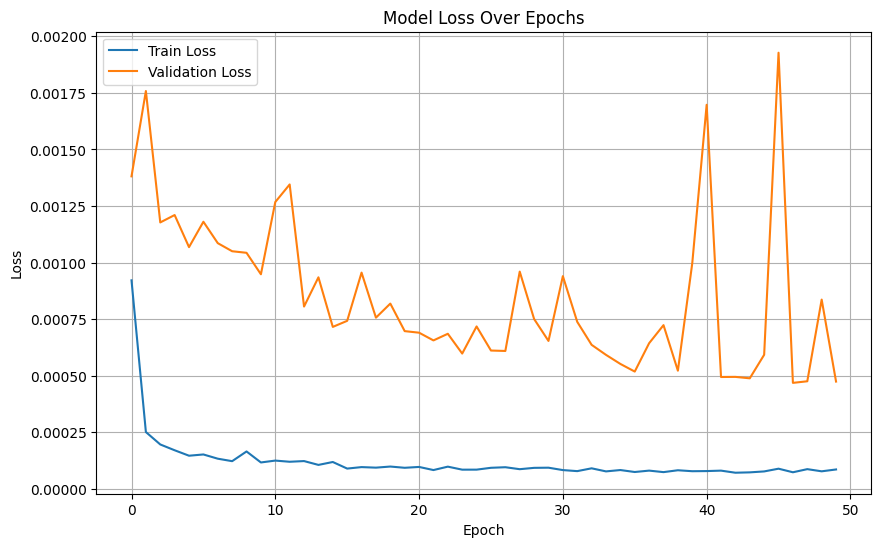

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Predict on training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actuals
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


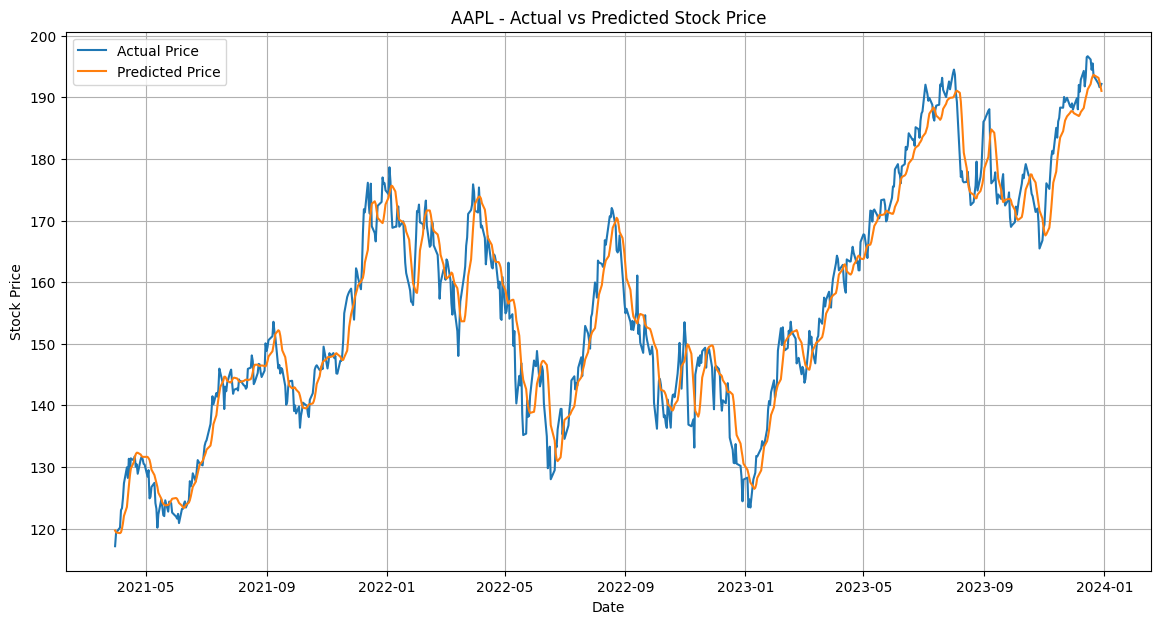

In [12]:
# Plot test predictions vs actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual Price')
plt.plot(data.index[-len(test_predict):], test_predict, label='Predicted Price')
plt.title(f"{ticker} - Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def forecast_future(model, data, window_size, days_to_predict):
    future_predictions = []
    current_window = data[-window_size:]  # Last known window

    for _ in range(days_to_predict):
        pred = model.predict(current_window.reshape(1, window_size, 1), verbose=0)
        future_predictions.append(pred[0, 0])
        current_window = np.append(current_window[1:], pred).reshape(window_size, 1)

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [14]:
future_days = 30
future_prices = forecast_future(model, scaled_data, window_size, future_days)

# Create future date range
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days+1, freq='B')[1:]  # Business days

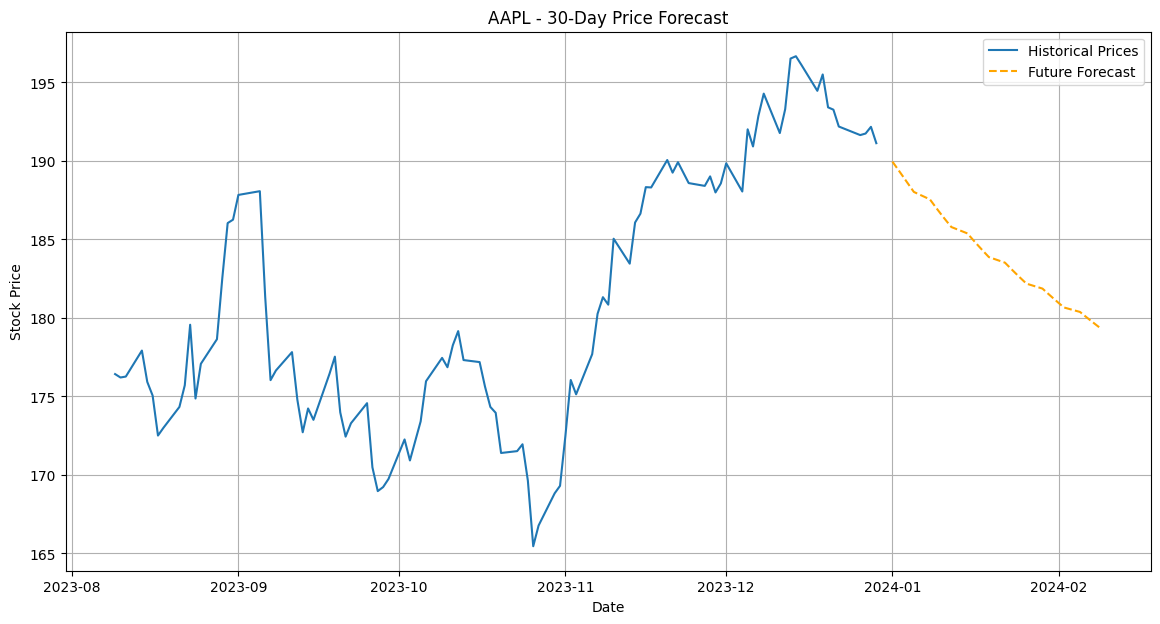

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-100:], data['Close'].values[-100:], label='Historical Prices')
plt.plot(future_dates, future_prices, label='Future Forecast', linestyle='--', color='orange')
plt.title(f"{ticker} - {future_days}-Day Price Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
!pip install gradio
import gradio as gr

def predict_stock(ticker, start_date, end_date, future_days):
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    if data.empty:
        return "No data found for the given inputs.", None

    # Preprocess
    scaled_data = scaler.fit_transform(data)
    X, y = create_sequences(scaled_data, window_size)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Predict future
    future_prices = forecast_future(model, scaled_data, window_size, future_days)

    # Generate future dates
    last_date = data.index[-1]
    future_dates = pd.date_range(last_date, periods=future_days+1, freq='B')[1:]

    # Plot
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(data.index[-100:], data['Close'].values[-100:], label="Historical")
    ax.plot(future_dates, future_prices, label="Forecast", linestyle="--", color='orange')
    ax.set_title(f"{ticker} - {future_days}-Day Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.grid(True)
    ax.legend()

    # Format forecast values for display
    forecast_text = "\n".join(
        [f"{date.strftime('%Y-%m-%d')}: ${price[0]:.2f}" for date, price in zip(future_dates, future_prices)]
    )

    return forecast_text, fig

In [20]:
gr.Interface(
    fn=predict_stock,
    inputs=[
        gr.Textbox(label="Stock Ticker (e.g. AAPL)"),
        gr.Textbox(label="Start Date (YYYY-MM-DD)", value="2015-01-01"),
        gr.Textbox(label="End Date (YYYY-MM-DD)", value=pd.to_datetime("today").strftime("%Y-%m-%d")),
        gr.Slider(7, 60, value=30, label="Forecast Days")
    ],
    outputs=[
        gr.Textbox(label="Forecasted Prices"),
        gr.Plot(label="Forecast Chart")
    ],
    title="Stock Price Forecast"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://48980583afe2b309f1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
